In [15]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse


#Enabling Interactive plots on google colab
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)
  

In [14]:
! pip install chart_studio

     |████████████████████████████████| 71kB 2.1MB/s 


In [22]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.shape)

(1470, 35)


Data Description and Visualization

In [23]:
df_hr = df.copy()
df_hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [24]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [25]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Data contains no missing values.

In [26]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


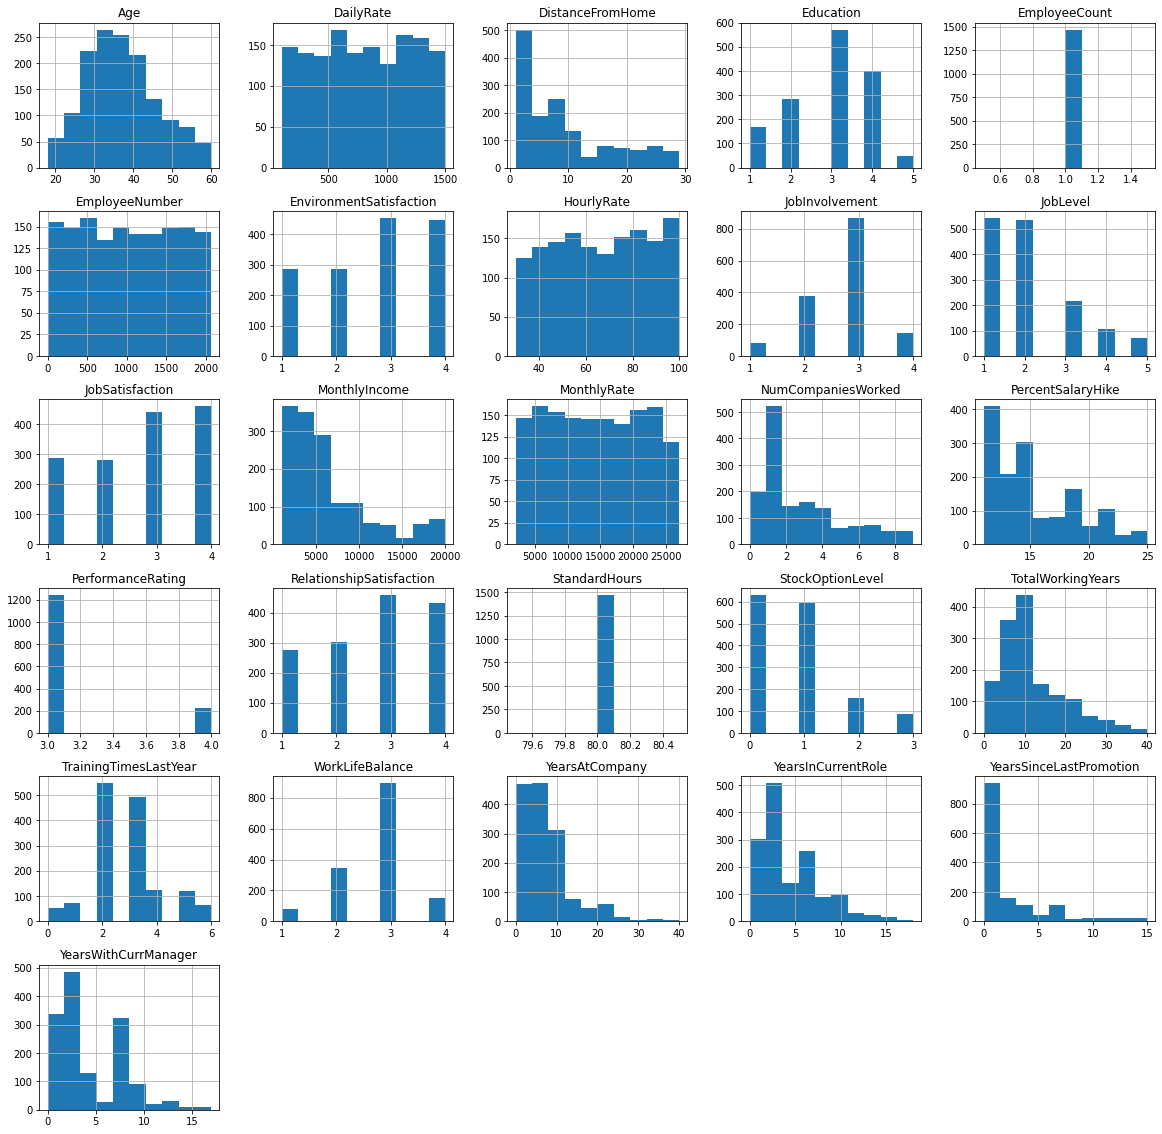

In [27]:
df_hr.hist(figsize=(20,20))
plt.show()

.




Feature distribution by target attribute


In [28]:
#Age

(mu, sigma) = norm.fit(df_hr.loc[df_hr['Attrition'] == 'Yes', 'Age'])
print('Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))

(mu, sigma) = norm.fit(df_hr.loc[df_hr['Attrition'] == 'No', 'Age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))


Ex-exmployees: average age = 33.6 years old and standard deviation = 9.7
Current exmployees: average age = 37.6 years old and standard deviation = 8.9


In [29]:
#Creating a Kernal Density Estimation plot

x1 = df_hr.loc[df_hr['Attrition'] == 'No', 'Age']
x2 = df_hr.loc[df_hr['Attrition'] == 'Yes', 'Age']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

fig = ff.create_distplot(hist_data, group_labels, curve_type='kde', show_hist=False, show_rug=False)
fig['layout'].update(title='Age Distribution in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[15, 60], dtick=5))


fig.show(renderer = "colab")
#py.iplot(fig, filename='Distplot with Multiple Datasets')


In [30]:
#Educational Fields
df_hr['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [31]:
#Normalized percentage of Leavers for each Field.

df_BusinessTravel = pd.DataFrame(columns=["Business Travel", "% of Leavers"])
i=0
for field in list(df_hr['BusinessTravel'].unique()):
    ratio = df_hr[(df_hr['BusinessTravel']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100)) 

enable_plotly_in_cell()   
df_BT = df_BusinessTravel.groupby(by="Business Travel").sum()
df_BT.iplot(kind='bar',title='Leavers by Business Travel (%)')

Output hidden; open in https://colab.research.google.com to view.

In [32]:
#Gender
df_hr['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [33]:
print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%."
        .format((df_hr[(df_hr['Attrition'] == 'Yes') & (
        df_hr['Gender'] == 'Male')].shape[0] / df_hr[df_hr['Gender'] == 'Male'].shape[0])*100, 
        (df_hr[(df_hr['Attrition'] == 'Yes') & (df_hr['Gender'] == 'Female')].shape[0] / df_hr[df_hr['Gender'] == 'Female'].shape[0])*100))


Normalised gender distribution of ex-employees in the dataset: Male = 17.0%; Female 14.8%.


In [34]:
df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i=0
for field in list(df_hr['Gender'].unique()):
    ratio = df_hr[(df_hr['Gender']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['Gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100)) 

enable_plotly_in_cell()   
df_G = df_Gender.groupby(by="Gender").sum()
df_G.iplot(kind='bar',title='Leavers by Gender (%)')

Output hidden; open in https://colab.research.google.com to view.

In [35]:
#Marital Status
df_hr['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [36]:
df_Marital = pd.DataFrame(columns=["Marital Status", "% of Leavers"])
i=0
for field in list(df_hr['MaritalStatus'].unique()):
    ratio = df_hr[(df_hr['MaritalStatus']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['MaritalStatus']==field].shape[0]
    df_Marital.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))  


enable_plotly_in_cell()   
df_MF = df_Marital.groupby(by="Marital Status").sum()
df_MF.iplot(kind='bar',title='Leavers by Marital Status (%)')

Output hidden; open in https://colab.research.google.com to view.

In [37]:
#Distance from Home

print("Distance from home for employees to get to work is from {} to {} miles."
        .format(df_hr['DistanceFromHome'].min(),
                df_hr['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [38]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_hr[df_hr['Attrition'] == 'No']['DistanceFromHome'].mean(), df_hr[df_hr['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


In [39]:
x1 = df_hr.loc[df_hr['Attrition']=='No','DistanceFromHome']
x2 = df_hr.loc[df_hr['Attrition']=='Yes','DistanceFromHome']

hist_data = [x1, x2]
group_labels = ['Active- Employees', 'Ex-Employees']

fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
fig['layout'].update( title='Distance From Home Distribution in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 30], dtick=2))

fig.show(renderer = "colab")



In [40]:
#Department
df_hr['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [41]:
df_Department = pd.DataFrame(columns=["Department", "% of Leavers"])
i=0
for field in list(df_hr['Department'].unique()):
    ratio = df_hr[(df_hr['Department']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['Department']==field].shape[0]
    df_Department.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))   

enable_plotly_in_cell()     
df_DF = df_Department.groupby(by="Department").sum()
df_DF.iplot(kind='bar',title='Leavers by Department (%)')

Output hidden; open in https://colab.research.google.com to view.

In [43]:
#Role and Work conditions (Travel commitment varies)
df_hr['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [44]:
df_BusinessTravel = pd.DataFrame(columns=["Business Travel", "% of Leavers"])
i=0
for field in list(df_hr['BusinessTravel'].unique()):
    ratio = df_hr[(df_hr['BusinessTravel']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100)) 

enable_plotly_in_cell()       
df_BT = df_BusinessTravel.groupby(by="Business Travel").sum()
df_BT.iplot(kind='bar',title='Leavers by Business Travel (%)')

Output hidden; open in https://colab.research.google.com to view.

In [45]:
df_hr['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [46]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df_hr['JobRole'].unique()):
    ratio = df_hr[(df_hr['JobRole']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))  

enable_plotly_in_cell()      
df_JR = df_JobRole.groupby(by="Job Role").sum()
df_JR.iplot(kind='bar',title='Leavers by Job Role (%)')

Output hidden; open in https://colab.research.google.com to view.

In [47]:
df_hr['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [48]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df_hr['JobLevel'].unique()):
    ratio = df_hr[(df_hr['JobLevel']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100)) 

enable_plotly_in_cell()       
df_JL = df_JobLevel.groupby(by="Job Level").sum()
df_JL.iplot(kind='bar',title='Leavers by Job Level (%)')

Output hidden; open in https://colab.research.google.com to view.

In [49]:
df_hr['JobInvolvement'].value_counts() 
# Ranges from 1 = Low to 4 = Very High

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [50]:
df_JobInvolvement = pd.DataFrame(columns=["Job Involvement", "% of Leavers"])
i=0
for field in list(df_hr['JobInvolvement'].unique()):
    ratio = df_hr[(df_hr['JobInvolvement']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['JobInvolvement']==field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100)) 

enable_plotly_in_cell()       
df_JI = df_JobInvolvement.groupby(by="Job Involvement").sum()
df_JI.iplot(kind='bar',title='Leavers by Job Involvement (%)')

Output hidden; open in https://colab.research.google.com to view.

In [120]:
print("Number of training times last year varies from {} to {} years.".format(
    df_hr['TrainingTimesLastYear'].min(), df_hr['TrainingTimesLastYear'].max()))

Number of training times last year varies from 0 to 6 years.


In [122]:
x1 = df_hr.loc[df_hr['Attrition'] == 'No', 'TrainingTimesLastYear']
x2 = df_hr.loc[df_hr['Attrition'] == 'Yes', 'TrainingTimesLastYear']


hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
fig['layout'].update(
    title='Training Times Last Year metric in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 6], dtick=1))

fig.show(renderer='colab')

In [124]:
df_hr['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [125]:
df_NumCompaniesWorked = pd.DataFrame(columns=["Num Companies Worked", "% of Leavers"])
i=0
for field in list(df_hr['NumCompaniesWorked'].unique()):
    ratio = df_hr[(df_hr['NumCompaniesWorked']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['NumCompaniesWorked']==field].shape[0]
    df_NumCompaniesWorked.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100)) 

enable_plotly_in_cell()       
df_NC = df_NumCompaniesWorked.groupby(by="Num Companies Worked").sum()
df_NC.iplot(kind='bar',title='Leavers by Num Companies Worked (%)')

Output hidden; open in https://colab.research.google.com to view.

In [129]:
#Years at Company
df_hr['YearsAtCompany'].value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
27      2
29      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64

In [132]:
print('Average Number of Years at the company for currently active employees: {:.2f} miles and ex-employees: {:.2f} years'
        .format( df_hr[df_hr['Attrition'] == 'No']['YearsAtCompany'].mean(), df_hr[df_hr['Attrition'] == 'Yes']['YearsAtCompany'].mean()))


Average Number of Years at the company for currently active employees: 7.37 miles and ex-employees: 5.13 years


In [133]:
print("Number of Years at the company varies from {} to {} years.".format(
    df_hr['YearsAtCompany'].min(), df_hr['YearsAtCompany'].max()))

Number of Years at the company varies from 0 to 40 years.


In [138]:
x1 = df_hr.loc[df_hr['Attrition'] == 'No', 'YearsAtCompany']
x2 = df_hr.loc[df_hr['Attrition'] == 'Yes', 'YearsAtCompany']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
fig['layout'].update(title='Years At Company in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 40], dtick=5))

fig.show(renderer='colab')


In [139]:
print("Number of Years in the current role varies from {} to {} years.".format(
    df_hr['YearsInCurrentRole'].min(), df_hr['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years.


In [141]:
x1 = df_hr.loc[df_hr['Attrition'] == 'No', 'YearsInCurrentRole']
x2 = df_hr.loc[df_hr['Attrition'] == 'Yes', 'YearsInCurrentRole']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)

fig['layout'].update(title='Years In Current Role in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 18], dtick=1))

fig.show(renderer='colab')


In [142]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    df_hr['YearsSinceLastPromotion'].min(), df_hr['YearsSinceLastPromotion'].max()))


Number of Years since last promotion varies from 0 to 15 years.


In [143]:
x1 = df_hr.loc[df_hr['Attrition'] == 'No', 'YearsSinceLastPromotion']
x2 = df_hr.loc[df_hr['Attrition'] == 'Yes', 'YearsSinceLastPromotion']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)

fig['layout'].update(title='Years Since Last Promotion in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 15], dtick=1))

fig.show(renderer='colab')

In [144]:
print("Total working years varies from {} to {} years.".format(
    df_hr['TotalWorkingYears'].min(), df_hr['TotalWorkingYears'].max()))

Total working years varies from 0 to 40 years.


In [145]:

x1 = df_hr.loc[df_hr['Attrition'] == 'No', 'TotalWorkingYears']
x2 = df_hr.loc[df_hr['Attrition'] == 'Yes', 'TotalWorkingYears']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)

fig['layout'].update(title='Total Working Years in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 40], dtick=5))

fig.show(renderer='colab')

In [147]:
#Years with current Manager

print('Average Number of Years with current manager for currently active employees: {:.2f} years and ex-employees: {:.2f} years'.format(
    df_hr[df_hr['Attrition'] == 'No']['YearsWithCurrManager'].mean(), df_hr[df_hr['Attrition'] == 'Yes']['YearsWithCurrManager'].mean()))

Average Number of Years with current manager for currently active employees: 4.37 years and ex-employees: 2.85 years


In [148]:
print("Number of Years with current manager varies from {} to {} years.".format(
    df_hr['YearsWithCurrManager'].min(), df_hr['YearsWithCurrManager'].max()))


Number of Years with current manager varies from 0 to 17 years.


In [150]:

x1 = df_hr.loc[df_hr['Attrition'] == 'No', 'YearsWithCurrManager']
x2 = df_hr.loc[df_hr['Attrition'] == 'Yes', 'YearsWithCurrManager']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)

fig['layout'].update(
    title='Years With Current Manager in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 17], dtick=1))

fig.show(renderer='colab')

In [151]:
#Work-Life Balance
df_hr['WorkLifeBalance'].value_counts()


3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [152]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df_hr['WorkLifeBalance'].unique()):
    ratio = df_hr[(df_hr['WorkLifeBalance']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100)) 

enable_plotly_in_cell()       
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
df_WLB.iplot(kind='bar',title='Leavers by WorkLifeBalance (%)')

Output hidden; open in https://colab.research.google.com to view.

In [153]:
df_hr['StandardHours'].value_counts()


80    1470
Name: StandardHours, dtype: int64

In [154]:
df_hr['OverTime'].value_counts()


No     1054
Yes     416
Name: OverTime, dtype: int64

In [156]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df_hr['OverTime'].unique()):
    ratio = df_hr[(df_hr['OverTime']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))

enable_plotly_in_cell()        
df_OT = df_OverTime.groupby(by="OverTime").sum()
df_OT.iplot(kind='bar',title='Leavers by OverTime (%)')

Output hidden; open in https://colab.research.google.com to view.

In [157]:
#Employee wage information

print("Employee Hourly Rate varies from ${} to ${}.".format(
    df_hr['HourlyRate'].min(), df_hr['HourlyRate'].max()))


Employee Hourly Rate varies from $30 to $100.


In [158]:
print("Employee Daily Rate varies from ${} to ${}.".format(
    df_hr['DailyRate'].min(), df_hr['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [159]:
print("Employee Monthly Rate varies from ${} to ${}.".format(
    df_hr['MonthlyRate'].min(), df_hr['MonthlyRate'].max()))

Employee Monthly Rate varies from $2094 to $26999.


In [160]:
print("Employee Monthly Income varies from ${} to ${}.".format(
    df_hr['MonthlyIncome'].min(), df_hr['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


In [164]:

x1 = df_hr.loc[df_hr['Attrition'] == 'No', 'MonthlyIncome']
x2 = df_hr.loc[df_hr['Attrition'] == 'Yes', 'MonthlyIncome']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)

fig['layout'].update(title='Monthly Income by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 20000], dtick=2000))

fig.show(renderer='colab')

In [165]:
print("Percentage Salary Hikes varies from {}% to {}%.".format(
    df_hr['PercentSalaryHike'].min(), df_hr['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%.


In [166]:
x1 = df_hr.loc[df_hr['Attrition'] == 'No', 'PercentSalaryHike']
x2 = df_hr.loc[df_hr['Attrition'] == 'Yes', 'PercentSalaryHike']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)

fig['layout'].update(title='Percent Salary Hike by Attrition Status')
fig['layout'].update(xaxis=dict(range=[10, 26], dtick=1))

fig.show(renderer='colab')

In [171]:
print("Stock Option Levels varies from {} to {}.".format(
    df_hr['StockOptionLevel'].min(), df_hr['StockOptionLevel'].max()))

Stock Option Levels varies from 0 to 3.


In [173]:
print("Normalised percentage of leavers by Stock Option Level: 1: {:.2f}%, 2: {:.2f}%, 3: {:.2f}%".format(
    df_hr[(df_hr['Attrition'] == 'Yes') & (df_hr['StockOptionLevel'] == 1)
          ].shape[0] / df_hr[df_hr['StockOptionLevel'] == 1].shape[0]*100,
    df_hr[(df_hr['Attrition'] == 'Yes') & (df_hr['StockOptionLevel'] == 2)
          ].shape[0] / df_hr[df_hr['StockOptionLevel'] == 1].shape[0]*100,
    df_hr[(df_hr['Attrition'] == 'Yes') & (df_hr['StockOptionLevel'] == 3)].shape[0] / df_hr[df_hr['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 1: 9.40%, 2: 2.01%, 3: 2.52%


In [174]:
df_StockOptionLevel = pd.DataFrame(columns=["StockOptionLevel", "% of Leavers"])
i=0
for field in list(df_hr['StockOptionLevel'].unique()):
    ratio = df_hr[(df_hr['StockOptionLevel']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['StockOptionLevel']==field].shape[0]
    df_StockOptionLevel.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100)) 

enable_plotly_in_cell()   
df_SOL = df_StockOptionLevel.groupby(by="StockOptionLevel").sum()
df_SOL.iplot(kind='bar',title='Leavers by Stock Option Level (%)')

Output hidden; open in https://colab.research.google.com to view.

In [175]:
#Employee Satisfaction and Performance

df_hr['EnvironmentSatisfaction'].value_counts()


3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [176]:
df_EnvironmentSatisfaction = pd.DataFrame(columns=["EnvironmentSatisfaction", "% of Leavers"])
i=0
for field in list(df_hr['EnvironmentSatisfaction'].unique()):
    ratio = df_hr[(df_hr['EnvironmentSatisfaction']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['EnvironmentSatisfaction']==field].shape[0]
    df_EnvironmentSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100)) 

enable_plotly_in_cell()   
df_Env = df_EnvironmentSatisfaction.groupby(by="EnvironmentSatisfaction").sum()
df_Env.iplot(kind='bar',title='Leavers by Environment Satisfaction (%)')

Output hidden; open in https://colab.research.google.com to view.

In [177]:
df_hr['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [178]:
df_JobSatisfaction = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for field in list(df_hr['JobSatisfaction'].unique()):
    ratio = df_hr[(df_hr['JobSatisfaction']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))   

enable_plotly_in_cell()     
df_JS = df_JobSatisfaction.groupby(by="JobSatisfaction").sum()
df_JS.iplot(kind='bar',title='Leavers by Job Satisfaction (%)')

Output hidden; open in https://colab.research.google.com to view.

In [179]:
df_hr['RelationshipSatisfaction'].value_counts()


3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [180]:
df_RelationshipSatisfaction = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for field in list(df_hr['RelationshipSatisfaction'].unique()):
    ratio = df_hr[(df_hr['RelationshipSatisfaction']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['RelationshipSatisfaction']==field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))  

enable_plotly_in_cell()      
df_RS = df_RelationshipSatisfaction.groupby(by="RelationshipSatisfaction").sum()
df_RS.iplot(kind='bar',title='Leavers by Relationship Satisfaction (%)')

Output hidden; open in https://colab.research.google.com to view.

In [181]:
df_hr['PerformanceRating'].value_counts()


3    1244
4     226
Name: PerformanceRating, dtype: int64

In [182]:
print("Normalised percentage of leavers by Stock Option Level: 3: {:.2f}%, 4: {:.2f}%".format(
    df_hr[(df_hr['Attrition'] == 'Yes') & (df_hr['PerformanceRating'] == 3)
          ].shape[0] / df_hr[df_hr['StockOptionLevel'] == 1].shape[0]*100,
    df_hr[(df_hr['Attrition'] == 'Yes') & (df_hr['PerformanceRating'] == 4)].shape[0] / df_hr[df_hr['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 3: 33.56%, 4: 6.21%


In [183]:
df_PerformanceRating = pd.DataFrame(columns=["PerformanceRating", "% of Leavers"])
i=0
for field in list(df_hr['PerformanceRating'].unique()):
    ratio = df_hr[(df_hr['PerformanceRating']==field)&(df_hr['Attrition']=="Yes")].shape[0] / df_hr[df_hr['PerformanceRating']==field].shape[0]
    df_PerformanceRating.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))

enable_plotly_in_cell()        
df_PR = df_PerformanceRating.groupby(by="PerformanceRating").sum()
df_PR.iplot(kind='bar',title='Leavers by Performance Rating (%)')

Output hidden; open in https://colab.research.google.com to view.

In [184]:
#Attrition (Target Variable)
df_hr['Attrition'].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

In [185]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_hr[df_hr['Attrition'] == 'No'].shape[0] / df_hr.shape[0]*100,
    df_hr[df_hr['Attrition'] == 'Yes'].shape[0] / df_hr.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [187]:
enable_plotly_in_cell()
df_hr['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Attrition Distribution')

Output hidden; open in https://colab.research.google.com to view.

This is an imbalanced class program.


Computing Correlation

In [189]:
# Taking only significant correlations
df_HR_trans = df_hr.copy()
df_HR_trans['Target'] = df_HR_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_HR_trans = df_HR_trans.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_HR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


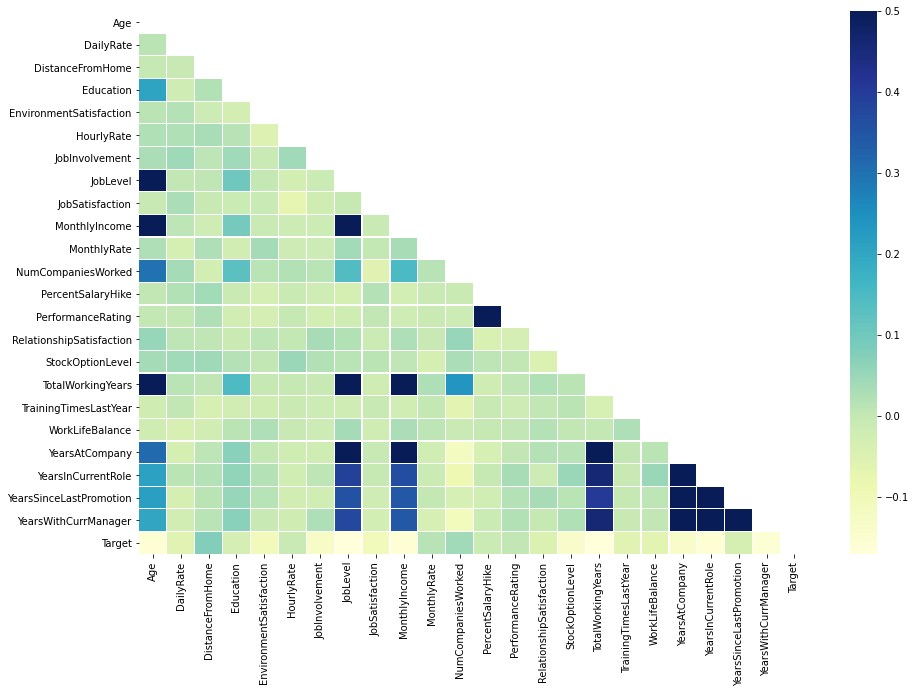

In [191]:
# Calculate correlations
corr = df_HR_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            linewidths=.2, cmap="YlGnBu")

Results of Exploratory Data Analysis:

1) The data set doesn't have any missing/erraneous value

2) Strongest positive correlations with the target features are : DistanceFromHome, Monthly Rate, Num. Companies Worked, Performance Rating

3) Strongest negative correlation with the target features are : Total Working Years, Job Level, Years In Current Role, Monthly Income.

4) Dataset is observed to be imbalanced

5) Redundant features include : EmployeeCount, EmployeeNumber, StandardHours, and Over18. 

Some observations about the people leaving :

1) Single employees comprise of the largest proportion.

2) People who will further away.

3) People who travel frequently

4) People who often work overtime

In [51]:
#Data Pre-processing (Encoding categorical labels with numerical values , 
#                      One-Hot encoding to avoid intoducing feature importance)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
 
le = LabelEncoder()
print(df_hr.shape)
df_hr.head()



(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [52]:
#label encoding for features with less than 3 unique values
le_count = 0
for col in df_hr.columns[1:]:
    if df_hr[col].dtype == 'object':
        if len(list(df_hr[col].unique())) <= 2:
            le.fit(df_hr[col])
            df_hr[col] = le.transform(df_hr[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [0]:
df_hr = pd.get_dummies(df_hr, drop_first=True) #Rest catergorical variables converted to dummies

In [54]:
print(df_hr.shape)
df_hr.head()

(1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [55]:
#Feature Scaling (Range 0 to 5)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_hr.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_hr[col] = df_hr[col].astype(float)
    df_hr[[col]] = scaler.fit_transform(df_hr[[col]])
df_hr['Attrition'] = pd.to_numeric(df_hr['Attrition'], downcast='float')
df_hr.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,3.333333,1.25,5.000000,1.312270,3.490263,4.444444,0.0,5.0,0.000000,0.0,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,1.666667,1.25,1.666667,1.085045,4.580004,0.555556,0.0,0.0,4.285714,5.0,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,1.666667,0.00,3.333333,0.284623,0.060630,3.333333,0.0,5.0,1.428571,0.0,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,3.333333,0.00,3.333333,0.500263,4.229070,0.555556,0.0,5.0,0.000000,0.0,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,3.333333,0.00,1.666667,0.647446,2.918691,5.000000,0.0,0.0,0.357143,0.0,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [56]:
print('Size of Full Encoded Dataset: {}'. format(df_hr.shape))


Size of Full Encoded Dataset: (1470, 49)


In [57]:
#Splitting data into train and test sets

target = df_hr['Attrition'].copy()

df_hr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df_hr.shape))


Size of Full dataset is: (1470, 44)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_hr,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 44)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 44)
Number transactions y_test dataset:  (368,)


Building Machine learning Algortihms


In [0]:
#Algorithms implemented : Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, Gaussian NB.

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [60]:
#Evaulating each model and providing the accuracy and standard deviation scores

acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluating each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)



,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,82.03,8.06,74.49,5.53
2,SVM,78.88,8.21,84.48,4.18
1,Random Forest,78.86,7.01,85.30,3.75
5,Gaussian NB,75.06,5.10,68.14,3.14
3,KNN,66.42,9.90,84.21,4.04
4,Decision Tree Classifier,58.02,6.23,76.22,4.23


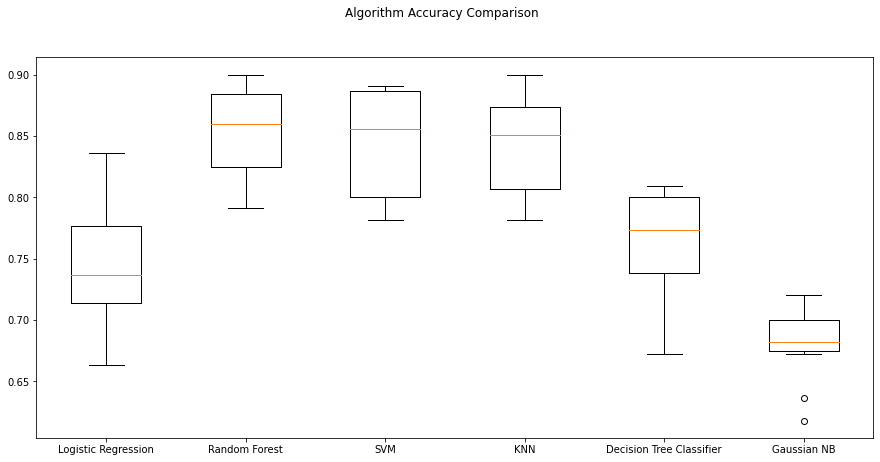

In [61]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

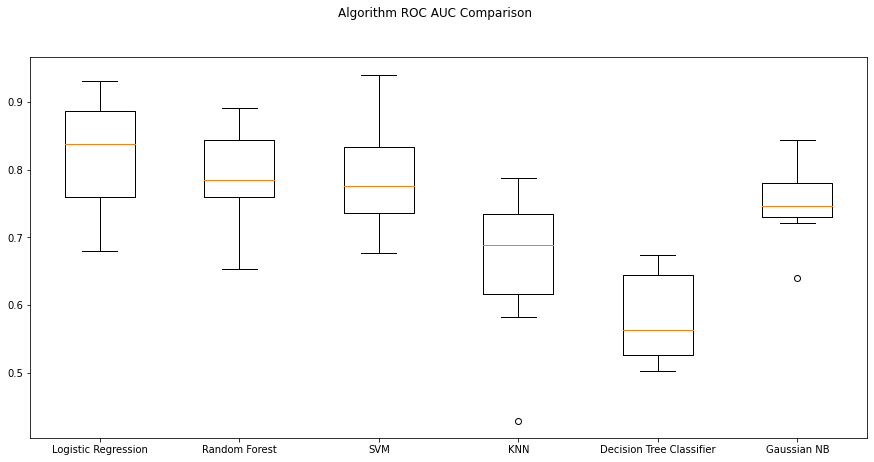

In [62]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

In [63]:
#Logistic Regression
kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.82 (0.08)


In [64]:
#Fine tuning the hyper-parameters
param_grid = {'C': np.arange(1e-03, 2, 0.01)} 
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', 
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.10099999999999998, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.10099999999999998}
best score: 0.8156630617245724


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



Text(0.5, 257.44, 'Predicted label')

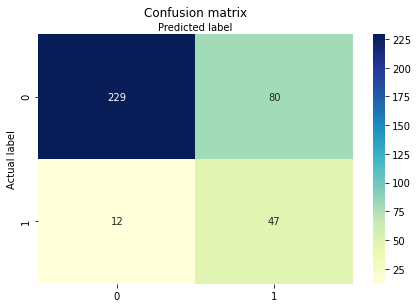

In [219]:
#Evaluating the model

cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [221]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 75.00


In [222]:
# Classification report for the optimised Logistic Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83       309
         1.0       0.37      0.80      0.51        59

    accuracy                           0.75       368
   macro avg       0.66      0.77      0.67       368
weighted avg       0.86      0.75      0.78       368



In [80]:
log_opt.fit(X_train, y_train) 
probs = log_opt.predict_proba(X_test)
probs = probs[:, 1] 
logit_roc_auc = roc_auc_score(y_test, probs) 
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.857


In [65]:
#Random Forest Classifier

rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
            'min_samples_leaf': [1, 2, 3, 4],
            'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)
best params: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 75}
best score: 0.7897378210924499


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



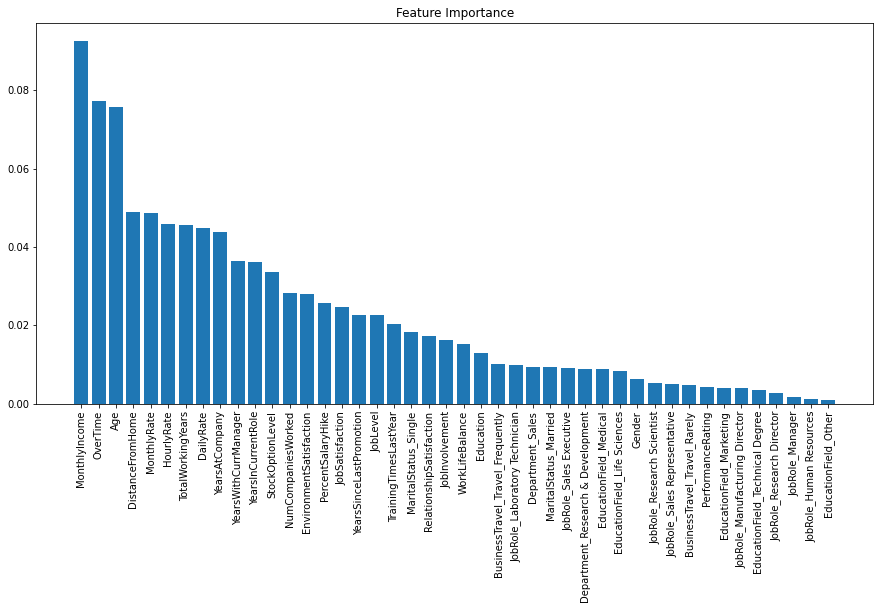

In [66]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) 
plt.title("Feature Importance") 
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show() 

In [67]:
#Random Forest helped us identify the Top 10 most important indicators

importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.092523
1,OverTime,0.077354
2,Age,0.075848
3,DistanceFromHome,0.049025
4,MonthlyRate,0.048579
5,HourlyRate,0.045979
6,TotalWorkingYears,0.045666
7,DailyRate,0.044751
8,YearsAtCompany,0.043847
9,YearsWithCurrManager,0.036423


Text(0.5, 257.44, 'Predicted label')

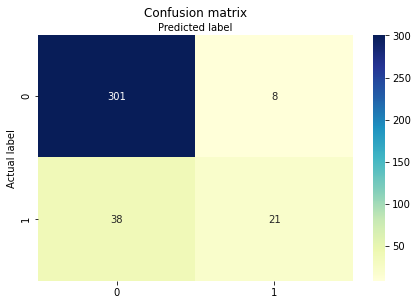

In [68]:
#Evaluating the Algorithm

cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [70]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 87.50


In [72]:
# Classification report for the optimised RF Regression

rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       309
         1.0       0.72      0.36      0.48        59

    accuracy                           0.88       368
   macro avg       0.81      0.67      0.70       368
weighted avg       0.86      0.88      0.86       368



In [74]:
rf_opt.fit(X_train, y_train) 
probs = rf_opt.predict_proba(X_test) 
probs = probs[:, 1] 
rf_opt_roc_auc = roc_auc_score(y_test, probs) 
print('AUC score: %.3f' % rf_opt_roc_auc)


AUC score: 0.829


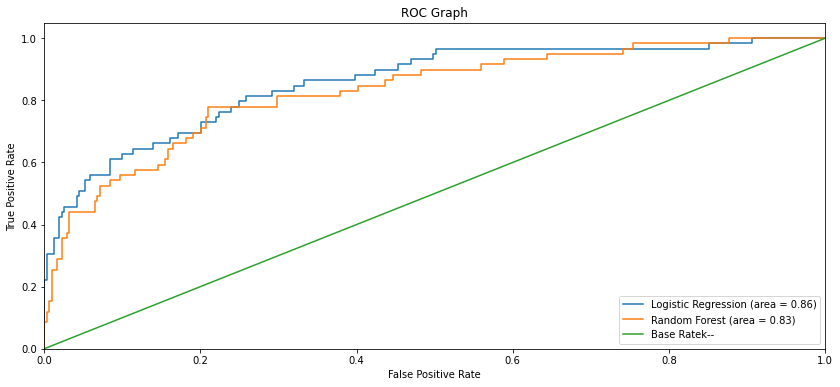

In [83]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

The fine-tuned Logistic Regression model showed a higher AUC score compared to the Random Forest Classifier